#MSc Project
**Title :** Pattern Recognition Approaches for Identifying and predicting Stock Market next-day Returns, Close price and Up/Down <br>

**Name:** Deboky Saha <br>
**Student ID:** 001142694 <br>
**Supervisor:** Georgios Samakovitis <br>
**Second Marker:** Christopher Walshaw


**This part of the code is for the implementation of one stock data**


To use interaction plot, it is necessary to install holoviews and hvplot.


In [ ]:
!pip install holoviews

In [ ]:
!pip install hvplot

#To install the technical library for stock market technical indicators Ta-lib needs to be installed. To do so, several steps are taken.


In [ ]:
# download TA-Lib 
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 

In [ ]:
!ls

drive  sample_data  ta-lib-0.4.0-src.tar.gz


In [ ]:
!tar xvzf ta-lib-0.4.0-src.tar.gz

In [ ]:
!ls

drive  sample_data  ta-lib  ta-lib-0.4.0-src.tar.gz


In [ ]:
import os

In [ ]:
os.chdir('ta-lib') # Can't use !cd in co-lab

In [ ]:
!./configure --prefix=/usr

In [ ]:
!make install


In [ ]:
os.chdir('../')

In [ ]:
!ls

drive  sample_data  ta-lib  ta-lib-0.4.0-src.tar.gz


In [ ]:
!pip install Ta-Lib


#Importing the required libraries

In [ ]:
# Dataframe library
import pandas as pd
import pandas_datareader.data as finData

# Linear Algebra library
import numpy as np


# Datetime library
import datetime as dt

# Visulaisation library

import matplotlib.pyplot as plt
from matplotlib import style 
import seaborn as sns
import holoviews as hv
import hvplot.pandas

# Techincal indicators library
import talib as ta 

# Data pre-processing libraries

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

# Machine Learning Model building libraries

from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# Deep Learning Model building libraries (LSTM)

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras import layers, models, optimizers
import tensorflow as tf

#Evaluation metrics

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
import math




**The dataset from Yahoo Finance is collected and uploaded into the Google Drive. 10 years data has been collected and it is read using pandas dataframe.**

In [ ]:
 DataFrame_AZN = pd.read_csv("/content/drive/MyDrive/AZN.csv")


**Viewing the dataset**

In [ ]:
DataFrame_AZN

Date       Open       High  ...      Close  Adj Close    Volume
0     2011-01-03  23.219999  23.389999  ...  23.180000  14.474536   1428800
1     2011-01-04  23.400000  23.469999  ...  23.410000  14.618157   1922400
2     2011-01-05  23.295000  23.650000  ...  23.639999  14.761774   4217600
3     2011-01-06  23.605000  23.660000  ...  23.620001  14.749290   2976800
4     2011-01-07  23.469999  23.500000  ...  23.475000  14.658748   2918600
...          ...        ...        ...  ...        ...        ...       ...
2512  2020-12-24  48.900002  48.900002  ...  48.520000  47.599960   4931700
2513  2020-12-28  50.230000  50.279999  ...  49.380001  48.443653  15481900
2514  2020-12-29  50.660000  50.700001  ...  49.900002  48.953793  17308500
2515  2020-12-30  50.459999  50.549999  ...  50.180000  49.228481  14349100
2516  2020-12-31  50.000000  50.090000  ...  49.990002  49.042088  10610000

[2517 rows x 7 columns]

**Visualising the Opening Price**

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
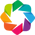

:Curve   [index]   (Open)

In [ ]:

plot = DataFrame_AZN['Open'].hvplot.line(
    frame_height=500, frame_width=500,
    xlabel='Date', ylabel='Price',
    title='Opening Stock Prices of AstraZeneca'
)
hv.extension('bokeh')
plot

# Calculating all the technical indicators

**Computing the Daily returns from the Adjusted Close**

In [ ]:
DataFrame_AZN['Daily_returns'] = DataFrame_AZN['Adj Close'].pct_change()


**Creating a column for Simple Moving Average with timeperiod 100. Simple Moving Average is calculated by adding close price and by dividing by 100.**

In [ ]:
DataFrame_AZN['100_SMA'] = ta.SMA(np.asarray(DataFrame_AZN['Close']),100)

**Calculating  EMA (Exponential Moving Average) and making it a column. EMA is calculated same as the SMA but by giving weight more to the recent price.**

In [ ]:
DataFrame_AZN['100_EMA'] = ta.EMA(np.asarray(DataFrame_AZN['Close']),100)


**Computing Average True Range (ATR). It provides information about the degree of price volatility.**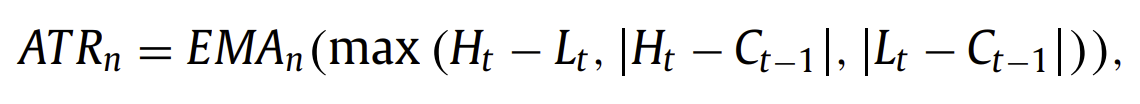

In [ ]:
# Calculation using the given formula above
high_low_Diff = DataFrame_AZN['High'] - DataFrame_AZN['Low']
high_close_Diff = np.abs(DataFrame_AZN['High'] - DataFrame_AZN['Close'].shift())
low_close_Diff = np.abs(DataFrame_AZN['Low'] - DataFrame_AZN['Close'].shift())

ranges = pd.concat([high_low_Diff, high_close_Diff, low_close_Diff], axis=1)
true_range = np.max(ranges, axis=1)

DataFrame_AZN['100_ATR'] = true_range.rolling(100).sum()/100

**Computing MACD.	MACD follows the trend of the stock, i.e. if MACD goes up then stock price 	also goes up and vice-a-versa.** <br> So, if the value of MACD at time ‘t’ is greater 	than the value at time ‘t-1’, opinion on trend is ‘up’ and represented as ‘+1’ and 	if the value of MACD at time ‘t’ is less than value.

MACD(n)t−1 + 2/n + 1 ×  (DIFFt − MACD(n)t−1)

where, DIFF: EMA(12)t − EMA(26)t


In [ ]:
# Firstly the short span is calculated and then the long span is calculated and then substructed 
Short_EMA = DataFrame_AZN['Close'].ewm(span = 12, adjust = False).mean()
Long_EMA = DataFrame_AZN['Close'].ewm(span = 26, adjust = False).mean()
DataFrame_AZN['MACD'] = Short_EMA - Long_EMA

**Computing Bollinger Bands**
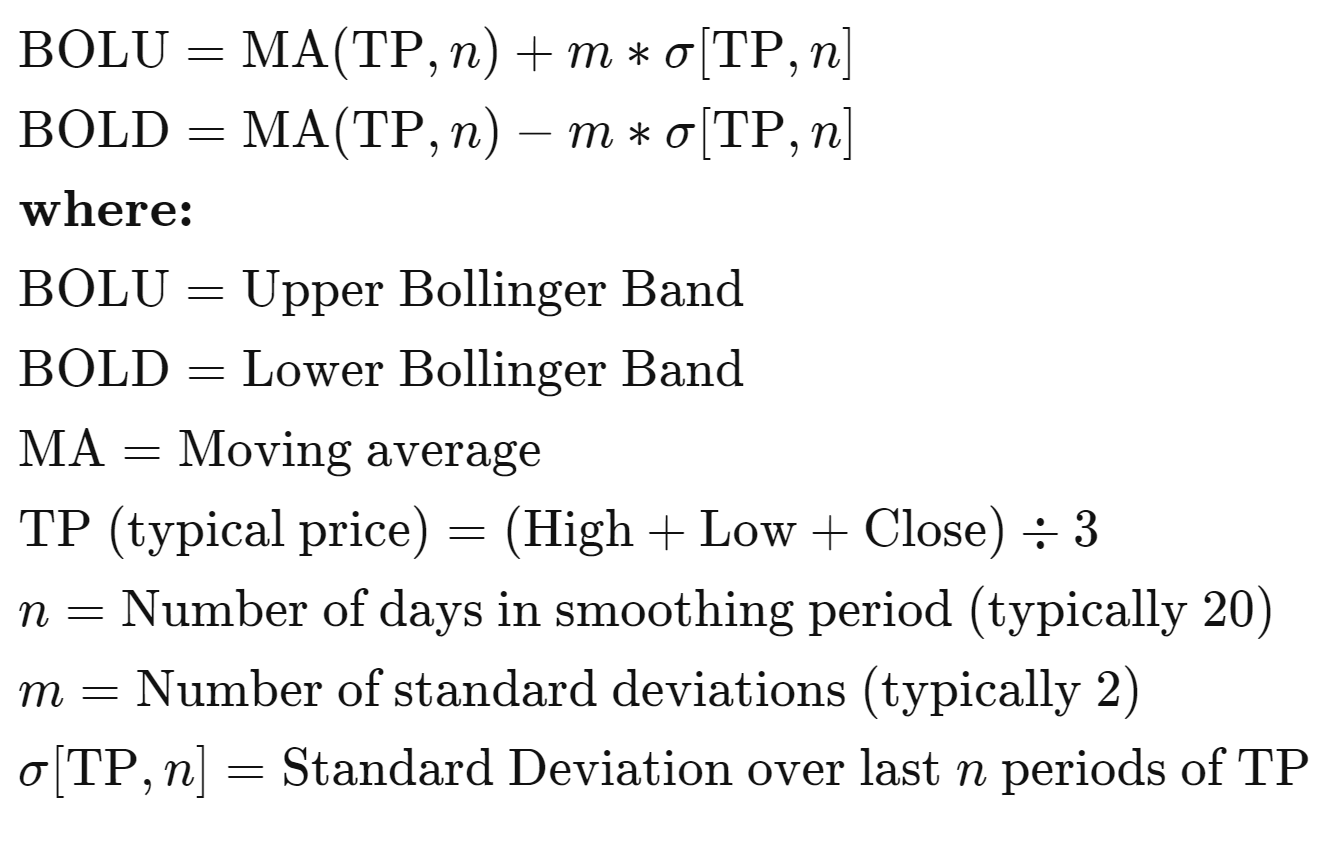

In [ ]:
# BB is calculated using the talib inbuilt function BBANDS
DataFrame_AZN['Upper Bollinger Bands'], DataFrame_AZN['Middle Bollinger Bands'],DataFrame_AZN['Lower Bollinger Bands'] = ta.BBANDS(np.asarray(DataFrame_AZN['Close']),timeperiod=20,nbdevup=2,nbdevdn=2,matype=0)

**Computing Parabolic Stop & Reverse.**

In [ ]:
# Parabolic Stop & Reverse is calculated using the talib built in function SAR
DataFrame_AZN['Parabolic Stop & Reverse'] = ta.SAR(np.asarray(DataFrame_AZN['High']),np.asarray(DataFrame_AZN['Low']),acceleration=0.02,maximum= 0.2)

**Computing Average Directional Index**



In [ ]:
#Average Directional index is calculated by using the talib function and the time period is chosen to be 14
Positive_DI = ta.PLUS_DI(np.asarray(DataFrame_AZN['High']),np.asarray(DataFrame_AZN['Low']),np.asarray(DataFrame_AZN['Close']),timeperiod=14)
Negative_DI = ta.MINUS_DI(np.asarray(DataFrame_AZN['High']),np.asarray(DataFrame_AZN['Low']),np.asarray(DataFrame_AZN['Close']),timeperiod=14)
DataFrame_AZN['ADX'] = ta.ADX(np.asarray(DataFrame_AZN['High']),np.asarray(DataFrame_AZN['Low']),np.asarray(DataFrame_AZN['Close']),timeperiod=14)

**Computing Commodity Channel Index(CCI)**
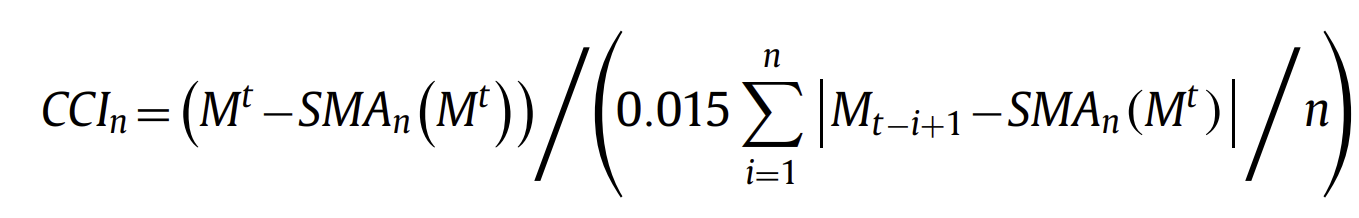

In [ ]:
# CCI is calculated using talib built in function and its timeperiod is chosen to be 100
DataFrame_AZN['CCI'] = ta.CCI(np.asarray(DataFrame_AZN['High']),np.asarray(DataFrame_AZN['Low']),np.asarray(DataFrame_AZN['Close']),timeperiod= 100)

**Computing Rate of Change.**

In [ ]:
# ROC is calculated using talib built in function and its timeperiod is chosen to be 21

DataFrame_AZN['ROC'] = ta.ROC(np.asarray(DataFrame_AZN['Close']),timeperiod= 21)

**Computing Relative Strength Index**
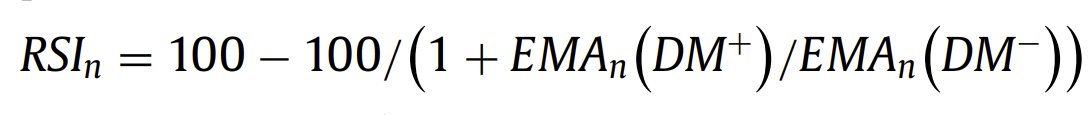

In [ ]:
## RSI is calculated using talib built in function and its timeperiod is chosen to be 14

DataFrame_AZN['RSI'] = ta.RSI(np.asarray(DataFrame_AZN['Close']),timeperiod= 14)

**Computing Stochastic K and Stochastic D**



In [ ]:
# Stochastic K and Stochastic D is calculated using talib built in function

DataFrame_AZN['Stochastic K'],DataFrame_AZN['Stochastic D'] = ta.STOCH(np.asarray(DataFrame_AZN['High']),np.asarray(DataFrame_AZN['Low']),np.asarray(DataFrame_AZN['Close']),fastk_period= 140, slowk_period= 30 , slowk_matype=0,slowd_period=30,slowd_matype=0)

**Computing William %R**

In [ ]:
#RSI is calculated using talib built in function and its timeperiod is chosen to be 140

DataFrame_AZN['William %R'] = ta.WILLR(np.asarray(DataFrame_AZN['High']),np.asarray(DataFrame_AZN['Low']),np.asarray(DataFrame_AZN['Close']),timeperiod= 140)

**Computing Volume Weighted Average Price**



In [ ]:
# VWAP is calculated using the formula it has
Average_Price = (DataFrame_AZN['High']+ DataFrame_AZN['Low']+DataFrame_AZN['Close'])/3
Product = Average_Price*DataFrame_AZN['Volume']
DataFrame_AZN['VWAP'] = Product/DataFrame_AZN['Volume']

**Computing On Balance Volume**

In [ ]:
#RSI is calculated using talib built in function 

DataFrame_AZN['OBV'] = ta.OBV(DataFrame_AZN['Close'],DataFrame_AZN['Volume'])

**Computing Chaikin Money Flow (CMF)**



In [ ]:
#RSI is calculated using formula it has. Here the window period is chosen to be 21

Diff_Close_Low = DataFrame_AZN['Close'] - DataFrame_AZN['Low']
Diff_High_Close = DataFrame_AZN['High'] - DataFrame_AZN['Close']
Diff_High_Low = DataFrame_AZN['High'] - DataFrame_AZN['Low']
Money_Flow_Multiplier = (Diff_Close_Low - Diff_High_Close)/Diff_High_Low
Money_Flow_Volume = Money_Flow_Multiplier*DataFrame_AZN['Volume']
Average_Daily_Money_Flow = Money_Flow_Volume.rolling(21,min_periods =1).mean()
Average_Volume = DataFrame_AZN['Volume'].rolling(21,min_periods =1).mean()
DataFrame_AZN['CMF'] = Average_Daily_Money_Flow/Average_Volume

**Computing Accumulation/Distribution Indicator**

In [ ]:
#A/D is calculated using talib built in function 

DataFrame_AZN['A/D'] = ta.AD(DataFrame_AZN['High'],DataFrame_AZN['Low'],DataFrame_AZN['Close'],DataFrame_AZN['Volume'])

**Plotting HeatMap to find the correlation between the Columns**



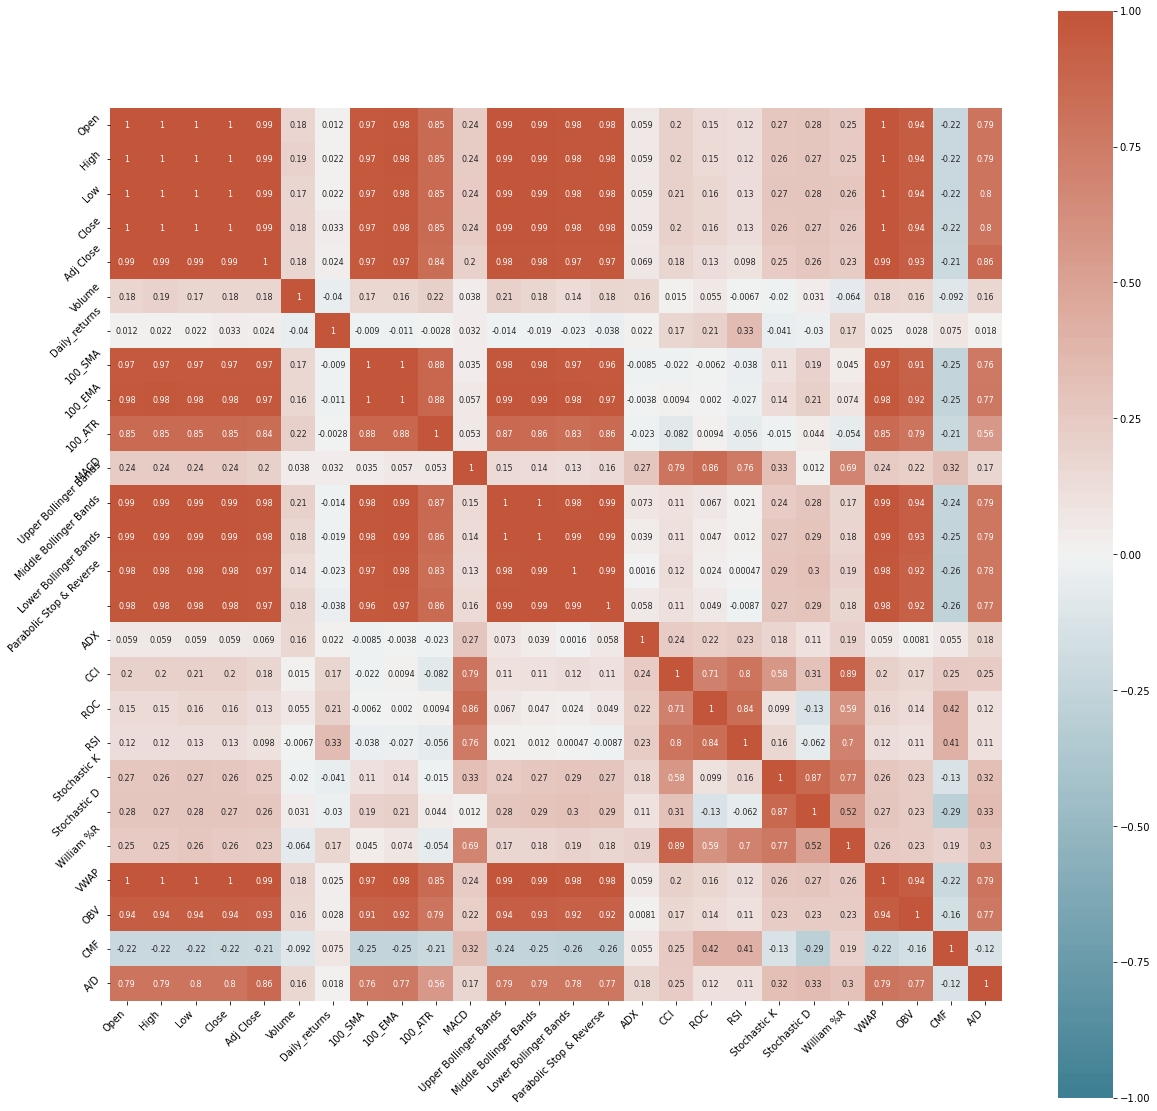

In [ ]:
# using matplotlib and seaborn this heatmap is constructed
plt.figure(figsize=(20, 20))
corr = DataFrame_AZN.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right')

plt.show()


# Data Pre-processing

**The dataset may have null values and to check the number of null values in each column, this piece of code is written.**

In [ ]:
DataFrame_AZN.isnull().sum()

Date                          0
Open                          0
High                          0
Low                           0
Close                         0
Adj Close                     0
Volume                        0
Daily_returns                 1
100_SMA                      99
100_EMA                      99
100_ATR                      99
MACD                          0
Upper Bollinger Bands        19
Middle Bollinger Bands       19
Lower Bollinger Bands        19
Parabolic Stop & Reverse      1
ADX                          27
CCI                          99
ROC                          21
RSI                          14
Stochastic K                197
Stochastic D                197
William %R                  139
VWAP                          0
OBV                           0
CMF                           0
A/D                           0
dtype: int64

In [ ]:
#Checking the length of the columns
len(DataFrame_AZN.columns)

27

**Calculating the output-1 which is the next day closing price**

In [ ]:
DataFrame_AZN['Output_NextClose'] = DataFrame_AZN['Close'].shift(1)

In [ ]:
DataFrame_AZN.shape[0]

2517

**Calculating the second output which is the next day returns**





In [ ]:
DataFrame_AZN['Output_NextReturns'] = DataFrame_AZN['Daily_returns'].shift(1)

**Calculating the third output which is the Stock Up/Down**


In [ ]:
DataFrame_AZN['Output_Up_Down'] = 0
for i in range(DataFrame_AZN.shape[0]-1):
  if (DataFrame_AZN['Close'][i+1]>DataFrame_AZN['Close'][i]):
    DataFrame_AZN['Output_Up_Down'][i+1] = 1 #Up
  else:
    DataFrame_AZN['Output_Up_Down'][i+1] = 0 #Down


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Viewing the DataFrame
DataFrame_AZN

Date       Open  ...  Output_NextReturns  Output_Up_Down
0     2011-01-03  23.219999  ...                 NaN               0
1     2011-01-04  23.400000  ...                 NaN               1
2     2011-01-05  23.295000  ...            0.009922               1
3     2011-01-06  23.605000  ...            0.009825               0
4     2011-01-07  23.469999  ...           -0.000846               0
...          ...        ...  ...                 ...             ...
2512  2020-12-24  48.900002  ...            0.000821               0
2513  2020-12-28  50.230000  ...           -0.005126               1
2514  2020-12-29  50.660000  ...            0.017725               1
2515  2020-12-30  50.459999  ...            0.010531               1
2516  2020-12-31  50.000000  ...            0.005611               0

[2517 rows x 30 columns]

In [ ]:
#Making the date as index
DataFrame_AZN.set_index('Date', inplace=True)

In [ ]:
DataFrame_AZN

Open       High  ...  Output_NextReturns  Output_Up_Down
Date                              ...                                    
2011-01-03  23.219999  23.389999  ...                 NaN               0
2011-01-04  23.400000  23.469999  ...                 NaN               1
2011-01-05  23.295000  23.650000  ...            0.009922               1
2011-01-06  23.605000  23.660000  ...            0.009825               0
2011-01-07  23.469999  23.500000  ...           -0.000846               0
...               ...        ...  ...                 ...             ...
2020-12-24  48.900002  48.900002  ...            0.000821               0
2020-12-28  50.230000  50.279999  ...           -0.005126               1
2020-12-29  50.660000  50.700001  ...            0.017725               1
2020-12-30  50.459999  50.549999  ...            0.010531               1
2020-12-31  50.000000  50.090000  ...            0.005611               0

[2517 rows x 29 columns]

**Filling the missing values with KNN imputer**

In [ ]:
impute_missing_knn = KNNImputer(n_neighbors=7)
Data_Merged_Filling = pd.DataFrame(impute_missing_knn.fit_transform(DataFrame_AZN))

In [ ]:
Data_Merged_Filling

0          1          2   ...         26        27   28
0     23.219999  23.389999  23.160000  ...  23.473571  0.001513  0.0
1     23.400000  23.469999  23.325001  ...  23.180000  0.001513  1.0
2     23.295000  23.650000  23.270000  ...  23.410000  0.009922  1.0
3     23.605000  23.660000  23.495001  ...  23.639999  0.009825  0.0
4     23.469999  23.500000  23.315001  ...  23.620001 -0.000846  0.0
...         ...        ...        ...  ...        ...       ...  ...
2512  48.900002  48.900002  48.169998  ...  48.770000  0.000821  0.0
2513  50.230000  50.279999  49.139999  ...  48.520000 -0.005126  1.0
2514  50.660000  50.700001  49.790001  ...  49.380001  0.017725  1.0
2515  50.459999  50.549999  50.040001  ...  49.900002  0.010531  1.0
2516  50.000000  50.090000  49.119999  ...  50.180000  0.005611  0.0

[2517 rows x 29 columns]

**After imputing the column names are missing and thus creating the dataframe with the filled values**

In [ ]:
 Attributes = ['Open','High','Low','Close','Adj Close','Volume','Daily_returns','100_SMA','100_EMA','100_ATR','MACD','Upper Bollinger Bands','Middle Bollinger Bands','Lower Bollinger Bands','Parabolic Stop & Reverse','ADX','CCI','ROC','RSI','Stochastic K','Stochastic D','William %R','VWAP','OBV','CMF','A/D','Output_NextClose','Output_NextReturns','Output_Up_Down']
 DataFrame_AZN_Updated = pd.DataFrame(Data_Merged_Filling.values,columns=Attributes)

In [ ]:
DataFrame_AZN_Updated

Open       High  ...  Output_NextReturns  Output_Up_Down
0     23.219999  23.389999  ...            0.001513             0.0
1     23.400000  23.469999  ...            0.001513             1.0
2     23.295000  23.650000  ...            0.009922             1.0
3     23.605000  23.660000  ...            0.009825             0.0
4     23.469999  23.500000  ...           -0.000846             0.0
...         ...        ...  ...                 ...             ...
2512  48.900002  48.900002  ...            0.000821             0.0
2513  50.230000  50.279999  ...           -0.005126             1.0
2514  50.660000  50.700001  ...            0.017725             1.0
2515  50.459999  50.549999  ...            0.010531             1.0
2516  50.000000  50.090000  ...            0.005611             0.0

[2517 rows x 29 columns]

**Creating a csv file with the filling values**

In [ ]:
DataFrame_AZN_Updated.to_csv('/content/drive/MyDrive/AZN_Stocks_Filled_Updated.csv')

**The input features are selected after viewing the correlation in the HeatMap and output is chosen one for classification and other for regression.**

In [ ]:


Input_Features =  ['Adj Close','Volume','Daily_returns','100_EMA','100_ATR','MACD','Middle Bollinger Bands','Parabolic Stop & Reverse','ADX','CCI','ROC','RSI','Stochastic K','Stochastic D','William %R','VWAP','OBV','CMF','A/D']
X = DataFrame_AZN_Updated[Input_Features]
y_Output_NextReturns = DataFrame_AZN_Updated['Output_NextReturns']

y_Output_NextClose = DataFrame_AZN_Updated['Output_NextClose']

y_Output_Up_Down = DataFrame_AZN_Updated['Output_Up_Down']


X.head()


Adj Close     Volume  Daily_returns  ...        OBV       CMF           A/D
0  14.474536  1428800.0       0.002159  ...  1428800.0 -0.826086 -1.180312e+06
1  14.618157  1922400.0       0.009922  ...  3351200.0 -0.253300 -8.488591e+05
2  14.761774  4217600.0       0.009825  ...  7568800.0  0.415751  3.146740e+06
3  14.749290  2976800.0      -0.000846  ...  4592000.0  0.443813  4.680270e+06
4  14.658748  2918600.0      -0.006139  ...  1673400.0  0.505790  6.810055e+06

[5 rows x 19 columns]

**Splitting the dataset into train and test**

In [ ]:

X_Train_NextReturns, X_Val_NextReturns, y_Train_Output_NextReturns, y_Val_Output_NextReturns = train_test_split(X,y_Output_NextReturns,test_size = 0.20, shuffle=False)
# y_Output_NextReturns is for regression problem

In [ ]:
X_Train_NextClose, X_Val_NextClose, y_Train_Output_NextClose, y_Val_Output_NextClose = train_test_split(X,y_Output_NextClose,test_size = 0.20, shuffle=False)
# y_Output_NextClose is for regression problem

In [ ]:
X_Train_Up_Down, X_Val_Up_Down, y_Train_Output_Up_Down, y_Val_Output_Up_Down = train_test_split(X,y_Output_Up_Down,test_size = 0.20,shuffle=False)
# y_Output_Up_Down is for classification problem

**Box-Cox Transformation will be used for this project as it resembles normal distribution which is important in time series analysis.**

For Machine Learning Models this is used.

In [ ]:


Power_Transformer_For_Stock_X = PowerTransformer() # Different features are in different scale and thus bringing them in one scale is crucial
Power_Transformer_For_Stock_y = PowerTransformer() # Output1 is the price and has thus it needs to come to a certain scale

#Transforming the training input dataset 
X_Train_NextReturns_PT = Power_Transformer_For_Stock_X.fit_transform(X_Train_NextReturns)
X_Train_Up_Down_PT =  Power_Transformer_For_Stock_X.fit_transform(X_Train_Up_Down)
X_Train_NextClose_PT = Power_Transformer_For_Stock_X.fit_transform(X_Train_NextClose)

#Transforming the validation input dataset 
X_Val_NextReturns_PT = Power_Transformer_For_Stock_X.fit_transform(X_Val_NextReturns)
X_Val_Up_Down_PT =  Power_Transformer_For_Stock_X.fit_transform(X_Val_Up_Down)
X_Val_NextClose_PT = Power_Transformer_For_Stock_X.fit_transform(X_Val_NextClose)

#Transforming the training output dataset 
y_Train_Output_NextReturns_reshape = y_Train_Output_NextReturns.values.reshape(-1, 1)
y_Train_Output_NextReturns_PT = Power_Transformer_For_Stock_y.fit_transform(y_Train_Output_NextReturns_reshape)

#Transforming the training output dataset 
y_Train_Output_NextClose_reshape = y_Train_Output_NextClose.values.reshape(-1, 1)
y_Train_Output_NextClose_PT = Power_Transformer_For_Stock_y.fit_transform(y_Train_Output_NextClose_reshape)


#Transforming the validation output dataset 
y_Val_Output_NextReturns_reshape = y_Val_Output_NextReturns.values.reshape(-1,1)
y_Val_Output_NextReturns_PT = Power_Transformer_For_Stock_y.fit_transform(y_Val_Output_NextReturns_reshape)


#Transforming the validation output dataset 
y_Val_Output_NextClose_reshape = y_Val_Output_NextClose.values.reshape(-1,1)
y_Val_Output_NextClose_PT = Power_Transformer_For_Stock_y.fit_transform(y_Val_Output_NextClose_reshape)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encounte

#Building a MODEL (SVC)

In [ ]:
# The kernel in the SVC model is chosen to be linear
Model_SVC = SVC(kernel='linear')

Model_SVC = Model_SVC.fit(X_Train_Up_Down_PT, y_Train_Output_Up_Down)

SVC_predict = Model_SVC.predict(X_Val_Up_Down_PT)



**Checking the Accuracy of the model**

In [ ]:

print("Accuracy:",metrics.accuracy_score(y_Val_Output_Up_Down, SVC_predict))


Accuracy: 0.9801587301587301


**Checking the presion of the model**

In [ ]:
print("Precision:",metrics.precision_score(y_Val_Output_Up_Down, SVC_predict))


Precision: 0.9775280898876404


**Checking Recall**

In [ ]:
print("Recall:",metrics.recall_score(y_Val_Output_Up_Down, SVC_predict))


Recall: 0.9849056603773585


#Model Train (SVR) for next day returns

In [ ]:
# The kernel in SVR is chosen to be rbf
# SVR model creation
Model_SVM_Regression_R = SVR(kernel='rbf')

Model_SVM_Regression_R.fit(X_Train_NextReturns_PT, y_Train_Output_NextReturns_PT)

# SVR model prediction
SVR_predict = Model_SVM_Regression_R.predict(X_Val_NextReturns_PT)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Calculating the evaluation metrics for regression problem

mse_SVR = mean_squared_error(y_Val_Output_NextReturns_PT, SVR_predict)
print(f'MSE of SVR: {mse_SVR}.')

rmse_SVR = math.sqrt(mean_squared_error(y_Val_Output_NextReturns_PT, SVR_predict))
print(f'RMSE of SVR: {rmse_SVR}.')

r2_SVR = r2_score(y_Val_Output_NextReturns_PT, SVR_predict)
print(f'R2 of SVR: {r2_SVR}.')

MSE of SVR: 0.7335802138365429.
RMSE of SVR: 0.8564929736060553.
R2 of SVR: 0.2664197861634571.


#SVR for Next day closing price

In [ ]:
# The kernel in SVR is chosen to be rbf
# SVR model creation
Model_SVM_Regression_CP = SVR(kernel='rbf')

Model_SVM_Regression_CP.fit(X_Train_NextClose_PT, y_Train_Output_NextClose_PT)

#SVR model prediction
SVR_predict_CP = Model_SVM_Regression_CP.predict(X_Val_NextClose_PT)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

# Calculating the evaluation metrics for regression problem

mse_SVR_CP = mean_squared_error(y_Val_Output_NextClose_PT, SVR_predict_CP)
print(f'MSE of SVR for CP: {mse_SVR_CP }.')

rmse_SVR_CP = math.sqrt(mean_squared_error(y_Val_Output_NextClose_PT, SVR_predict_CP))
print(f'RMSE of SVR for CP: {rmse_SVR_CP}.')

r2_SVR_CP = r2_score(y_Val_Output_NextClose_PT, SVR_predict_CP)
print(f'R2 of SVR for CP: {r2_SVR_CP}.')

MSE of SVR for CP: 0.033525809272498805.
RMSE of SVR for CP: 0.1831005441622138.
R2 of SVR for CP: 0.9664741907275012.


A scatter plot is computed with the returns and the relation is not good.

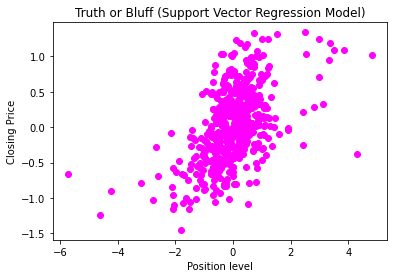

In [ ]:
plt.scatter(y_Val_Output_NextReturns_PT, SVR_predict, color = 'magenta')
# plt.plot(X, y_predict_Output1, color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Closing Price')
plt.show()

#RF Classification

In [ ]:

# random forest model creation
Model_RF_Classification = RandomForestClassifier(n_estimators= 10, criterion= 'entropy', random_state= False)
Model_RF_Classification.fit(X_Train_Up_Down_PT, y_Train_Output_Up_Down)
# predictions
RF_Classification_predict = Model_RF_Classification.predict(X_Val_Up_Down_PT)


**Checking the Accuracy of the model**

In [ ]:

print("Accuracy:",metrics.accuracy_score(y_Val_Output_Up_Down, RF_Classification_predict))


Accuracy: 0.998015873015873


**Checking the presion of the model**



In [ ]:
print("Precision:",metrics.precision_score(y_Val_Output_Up_Down, RF_Classification_predict))


Precision: 0.9962406015037594


**Checking Recall**

In [ ]:
print("Recall:",metrics.recall_score(y_Val_Output_Up_Down, RF_Classification_predict))


Recall: 1.0


##RF Regression for next day Returns

In [ ]:
# RF regressor model creation
RF_Regressor = RandomForestRegressor(n_estimators = 1000, random_state = False)
RF_Regressor.fit(X_Train_NextReturns_PT, y_Train_Output_NextReturns_PT)

# RF regressor model prediction
RF_Regressor_predict = RF_Regressor.predict(X_Val_NextReturns_PT)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Scatter plot to show the relationship among the test dataset and the created model.

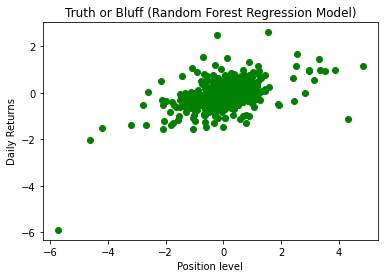

In [ ]:
plt.scatter(y_Val_Output_NextReturns_PT, RF_Regressor_predict, color = 'green')
# plt.plot(X, y_predict_Output1, color = 'green')
plt.title('Truth or Bluff (Random Forest Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Daily Returns')
plt.show()

Checking Regression matrics Score

In [ ]:
mse_RF_R = mean_squared_error(y_Val_Output_NextReturns_PT, RF_Regressor_predict)
print(f'MSE of RF for Returns: {mse_RF_R}.')
rmse_RF_R = math.sqrt(mean_squared_error(y_Val_Output_NextReturns_PT, RF_Regressor_predict))
print(f'RMSE of RF for Returns: {rmse_RF_R}.')
r2_RF_R = r2_score(y_Val_Output_NextReturns_PT, RF_Regressor_predict)
print(f'R2 of RF for Returns: {r2_RF_R}.')

MSE of RF for Returns: 0.749340850325723.
RMSE of RF for Returns: 0.8656447598904085.
R2 of RF for Returns: 0.25065914967427705.


#RF for next day closing price

In [ ]:
# RF regressor model creation
RF_Regressor_CP = RandomForestRegressor(n_estimators = 1000, random_state = False)
RF_Regressor_CP.fit(X_Train_NextClose_PT, y_Train_Output_NextClose_PT)

# RF regressor model prediction
RF_Regressor_predict_CP = RF_Regressor_CP.predict(X_Val_NextClose_PT)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
#Evaluation of the regression metrics

mse_RF_CP = mean_squared_error(y_Val_Output_NextClose_PT, RF_Regressor_predict_CP)
print(f'MSE of RF for CP: {mse_RF_CP}.')

rmse_RF_CP = math.sqrt(mean_squared_error(y_Val_Output_NextClose_PT, RF_Regressor_predict_CP))
print(f'RMSE of RF for CP: {rmse_RF_CP}.')

r2_RF_CP = r2_score(y_Val_Output_NextClose_PT, RF_Regressor_predict_CP)
print(f'R2 of RF for CP: {r2_RF_CP}.')

MSE of RF for CP: 0.009339922128625878.
RMSE of RF for CP: 0.09664327254716636.
R2 of RF for CP: 0.9906600778713741.


#Multivariant LSTM for Next Day Returns

---



In [ ]:
# Reshaping the input and output variables in order to send to the model

X_Train_reshape = X_Train_NextReturns_PT.reshape(-1, 1, 19) # 19 input features  
X_Val_reshape  = X_Val_NextReturns_PT.reshape(-1, 1, 19) # 19 input features  
y_Train_reshape = y_Train_Output_NextReturns_PT.reshape(-1, 1, 1) # The output has one value
y_Val_reshape = y_Val_Output_NextReturns_PT.reshape(-1, 1, 1) # The output has one value


Model_LSTM_R = Sequential()  
# First LSTM Layer with Dropout regularisation
Model_LSTM_R.add(LSTM(units = 70,input_shape=(1,19), activation='relu',return_sequences=True))
Model_LSTM_R.add(Dropout(0.2))
# Second LSTM Layer 
Model_LSTM_R.add(LSTM(units = 70,return_sequences=True))
Model_LSTM_R.add(Dropout(0.2))
# Third LSTM Layer 
Model_LSTM_R.add(LSTM(units = 70,return_sequences=True))
Model_LSTM_R.add(Dropout(0.2))
# Fourth LSTM Layer  
Model_LSTM_R.add(LSTM(units = 70))
Model_LSTM_R.add(Dropout(0.2))
# The Output Layer as it has 1 output (Next Returns)
Model_LSTM_R.add(Dense(units=1))

# Compiling the RNN
Model_LSTM_R.compile(optimizers.Adam(learning_rate=0.01),loss='mean_squared_error')

# Fitting to the training set

History_LSTM_R = Model_LSTM_R.fit(X_Train_reshape,y_Train_reshape,validation_data=(X_Val_reshape,y_Val_reshape),epochs=100,batch_size=64,verbose=1)

# Takes 46s to execute this cell in Colab Pro



Epoch 1/100
32/32 [==============================] - 9s 43ms/step - loss: 0.9689 - val_loss: 0.8991
Epoch 2/100
32/32 [==============================] - 0s 10ms/step - loss: 0.8809 - val_loss: 0.8016
Epoch 3/100
32/32 [==============================] - 0s 10ms/step - loss: 0.8011 - val_loss: 0.7327
Epoch 4/100
32/32 [==============================] - 0s 9ms/step - loss: 0.7633 - val_loss: 0.6337
Epoch 5/100
32/32 [==============================] - 0s 11ms/step - loss: 0.7748 - val_loss: 0.6855
Epoch 6/100
32/32 [==============================] - 0s 10ms/step - loss: 0.7385 - val_loss: 0.7417
Epoch 7/100
32/32 [==============================] - 0s 10ms/step - loss: 0.6945 - val_loss: 0.6798
Epoch 8/100
32/32 [==============================] - 0s 10ms/step - loss: 0.6806 - val_loss: 0.7276
Epoch 9/100
32/32 [==============================] - 0s 10ms/step - loss: 0.6891 - val_loss: 0.6694
Epoch 10/100
32/32 [==============================] - 0s 11ms/step - loss: 0.6661 - val_loss: 0.7130


In [ ]:
Model_LSTM_R.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 70)             25200     
                                                                 
 dropout (Dropout)           (None, 1, 70)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 70)             39480     
                                                                 
 dropout_1 (Dropout)         (None, 1, 70)             0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 70)             39480     
                                                                 
 dropout_2 (Dropout)         (None, 1, 70)             0         
                                                                 
 lstm_3 (LSTM)               (None, 70)                3

In [ ]:
train_predict_R = Model_LSTM_R.predict(X_Train_reshape)
test_predict_R = Model_LSTM_R.predict(X_Val_reshape)

In [ ]:
### Calculate RMSE performance metrics

rmse_LSTM = math.sqrt(mean_squared_error(y_Val_Output_NextReturns_PT,test_predict_R))
print(f'RMSE of LSTM for returns: {rmse_LSTM}.')

mse_LSTM = mean_squared_error(y_Val_Output_NextReturns_PT, test_predict_R)
print(f'MSE of LSTM for returns: {mse_LSTM}.')

r2_LSTM = r2_score(y_Val_Output_NextReturns_PT, test_predict_R)
print(f'R2 of LSTM for returns: {r2_LSTM}.')


RMSE of LSTM for returns: 1.1928555284677906.
MSE of LSTM for returns: 1.422904311796172.
R2 of LSTM for returns: -0.42290431179617194.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'Upper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


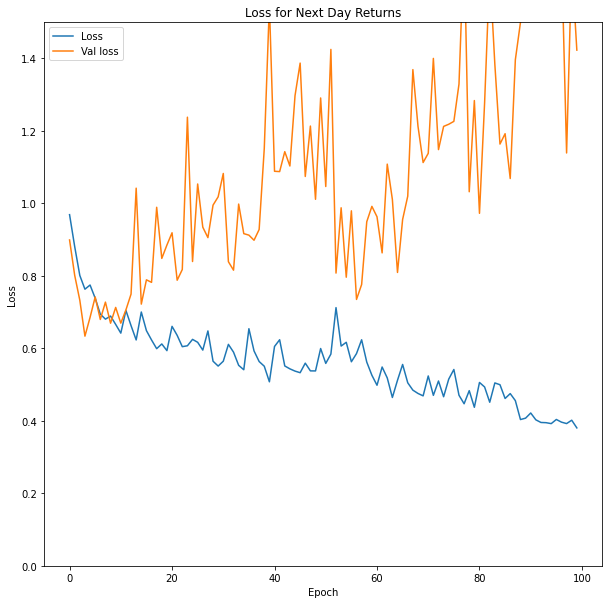

In [ ]:
# Validation
plt.figure(figsize=(10, 10))
plt.plot(History_LSTM_R.history['loss'], label='Loss')
plt.plot(History_LSTM_R.history['val_loss'], label = 'Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss for Next Day Returns')
plt.ylim([0, 1.5])
plt.legend(loc='Upper right')

#Multivariant LSTM for Next Day Closing Price


In [ ]:
#Reshaping the input and output features to feed into the LSTM model

X_Train_reshape_CP = X_Train_NextClose_PT.reshape(-1, 1, 19) # 19 input features  
X_Val_reshape_CP = X_Val_NextClose_PT.reshape(-1, 1, 19) # 19 input features  
y_Train_reshape_CP = y_Train_Output_NextClose_PT.reshape(-1, 1, 1) # The output has one value
y_Val_reshape_CP = y_Val_Output_NextClose_PT.reshape(-1, 1, 1) # The output has one value


Model_LSTM_CP = Sequential()  
# First LSTM Layer with Dropout regularisation
Model_LSTM_CP.add(LSTM(units = 70,input_shape=(1,19), activation='relu',return_sequences=True))
Model_LSTM_CP.add(Dropout(0.2))
# Second LSTM Layer 
Model_LSTM_CP.add(LSTM(units = 70,return_sequences=True))
Model_LSTM_CP.add(Dropout(0.2))
# Third LSTM Layer 
Model_LSTM_CP.add(LSTM(units = 70,return_sequences=True))
Model_LSTM_CP.add(Dropout(0.2))
# Fourth LSTM Layer  
Model_LSTM_CP.add(LSTM(units = 70))
Model_LSTM_CP.add(Dropout(0.2))
# The Output Layer as it has 1 output (Next Returns)
Model_LSTM_CP.add(Dense(units=1))

# Compiling the RNN
Model_LSTM_CP.compile(optimizers.Adam(learning_rate=0.01),loss='mean_squared_error')

# Fitting to the training set

History_LSTM_CP = Model_LSTM_CP.fit(X_Train_reshape_CP,y_Train_reshape_CP,validation_data=(X_Val_reshape_CP,y_Val_reshape_CP),epochs=100,batch_size=64,verbose=1)

# Takes 46s to execute this cell in Colab Pro



Epoch 1/100
32/32 [==============================] - 6s 46ms/step - loss: 0.2489 - val_loss: 0.0407
Epoch 2/100
32/32 [==============================] - 0s 10ms/step - loss: 0.0366 - val_loss: 0.0302
Epoch 3/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0248 - val_loss: 0.0155
Epoch 4/100
32/32 [==============================] - 0s 10ms/step - loss: 0.0203 - val_loss: 0.0187
Epoch 5/100
32/32 [==============================] - 0s 10ms/step - loss: 0.0191 - val_loss: 0.0121
Epoch 6/100
32/32 [==============================] - 0s 10ms/step - loss: 0.0176 - val_loss: 0.0136
Epoch 7/100
32/32 [==============================] - 0s 9ms/step - loss: 0.0170 - val_loss: 0.0107
Epoch 8/100
32/32 [==============================] - 0s 10ms/step - loss: 0.0157 - val_loss: 0.0136
Epoch 9/100
32/32 [==============================] - 0s 10ms/step - loss: 0.0137 - val_loss: 0.0108
Epoch 10/100
32/32 [==============================] - 0s 11ms/step - loss: 0.0148 - val_loss: 0.0141
E

In [ ]:
Model_LSTM_CP.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 70)             25200     
                                                                 
 dropout_4 (Dropout)         (None, 1, 70)             0         
                                                                 
 lstm_5 (LSTM)               (None, 1, 70)             39480     
                                                                 
 dropout_5 (Dropout)         (None, 1, 70)             0         
                                                                 
 lstm_6 (LSTM)               (None, 1, 70)             39480     
                                                                 
 dropout_6 (Dropout)         (None, 1, 70)             0         
                                                                 
 lstm_7 (LSTM)               (None, 70)               

In [ ]:
train_predict_CP = Model_LSTM_CP.predict(X_Train_reshape_CP)
test_predict_CP = Model_LSTM_CP.predict(X_Val_reshape_CP)

In [ ]:
### Calculate performance metrics

rmse_LSTM_CP = math.sqrt(mean_squared_error(y_Val_Output_NextClose_PT,test_predict_CP))
print(f'RMSE of LSTM for Closing price: {rmse_LSTM_CP}.')

mse_LSTM_CP = mean_squared_error(y_Val_Output_NextClose_PT,test_predict_CP)
print(f'MSE of LSTM for Closing price: {mse_LSTM_CP}.')

r2_LSTM_CP = r2_score(y_Val_Output_NextClose_PT,test_predict_CP)
print(f'R2 of LSTM for Closing price: {r2_LSTM_CP}.')


RMSE of LSTM for Closing price: 0.11440656283916022.
MSE of LSTM for Closing price: 0.013088861620670716.
R2 of LSTM for Closing price: 0.9869111383793293.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'Upper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


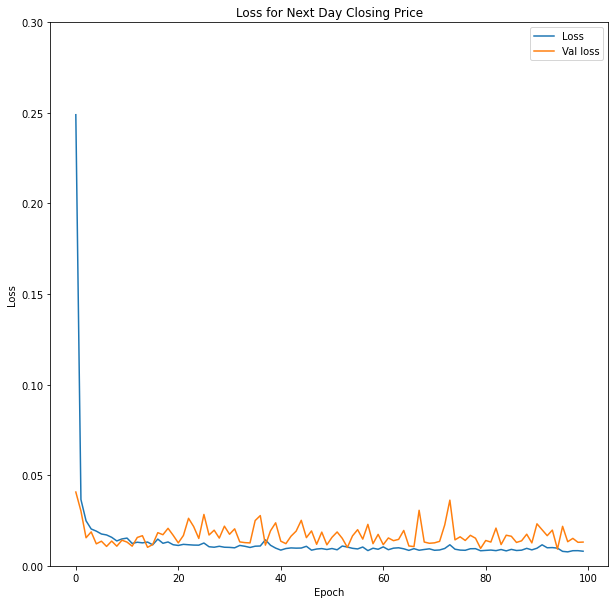

In [ ]:
# Validation
plt.figure(figsize=(10, 10))
plt.plot(History_LSTM_CP.history['loss'], label='Loss')
plt.plot(History_LSTM_CP.history['val_loss'], label = 'Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss for Next Day Closing Price')
plt.ylim([0, 0.3])
plt.legend(loc='Upper right')

#Multivariant LSTM for Up/Down

In [ ]:
## Creating model

# Reshaping the input and output variables before feeding into the model

X_Train_reshape_UP = X_Train_Up_Down_PT.reshape(-1, 1, 19) # 19 input features  
X_Val_reshape_UP = X_Val_Up_Down_PT.reshape(-1, 1, 19) # 19 input features  
y_Train_reshape_UP = y_Train_Output_Up_Down.values.reshape(-1, 1, 1) # The output has one value
y_Val_reshape_UP = y_Val_Output_Up_Down.values.reshape(-1, 1, 1) # The output has one value

#X_Train_Up_Down_PT,X_Val_Up_Down_PT.y_Train_Output_Up_Down,y_Val_Output_Up_Down

Metrices=['Precision', 'Recall','Accuracy']

Model_LSTM_UP = Sequential()  
# First LSTM Layer with Dropout regularisation
Model_LSTM_UP.add(LSTM(units = 70,input_shape=(1,19), activation='relu',return_sequences=True))
Model_LSTM_UP.add(Dropout(0.2))
# Second LSTM Layer 
Model_LSTM_UP.add(LSTM(units = 70,return_sequences=True))
Model_LSTM_UP.add(Dropout(0.2))
# Third LSTM Layer 
Model_LSTM_UP.add(LSTM(units = 70,return_sequences=True))
Model_LSTM_UP.add(Dropout(0.2))
# Fourth LSTM Layer  
Model_LSTM_UP.add(LSTM(units = 70))
Model_LSTM_UP.add(Dropout(0.2))
# The Output Layer as it has 1 output (Next Returns)
Model_LSTM_UP.add(Dense(1,activation='sigmoid'))



Model_LSTM_UP.compile(loss='binary_crossentropy',optimizer='adam',metrics= Metrices)


# Fitting to the training set

History_LSTM_UP = Model_LSTM_UP.fit(X_Train_reshape_UP,y_Train_reshape_UP,validation_data=(X_Val_reshape_UP,y_Val_reshape_UP),epochs=100,batch_size=64,verbose=1)

# Takes 46s to execute this cell in Colab Pro



Epoch 1/100
32/32 [==============================] - 7s 66ms/step - loss: 0.6920 - precision: 0.5083 - recall: 0.9873 - Accuracy: 0.5067 - val_loss: 0.6853 - val_precision: 0.5408 - val_recall: 1.0000 - val_Accuracy: 0.5536
Epoch 2/100
32/32 [==============================] - 0s 12ms/step - loss: 0.6275 - precision: 0.6401 - recall: 0.9220 - Accuracy: 0.6960 - val_loss: 0.5129 - val_precision: 0.7706 - val_recall: 0.8113 - val_Accuracy: 0.7738
Epoch 3/100
32/32 [==============================] - 0s 11ms/step - loss: 0.3554 - precision: 0.8469 - recall: 0.8626 - Accuracy: 0.8505 - val_loss: 0.2521 - val_precision: 0.9101 - val_recall: 0.9170 - val_Accuracy: 0.9087
Epoch 4/100
32/32 [==============================] - 0s 11ms/step - loss: 0.1931 - precision: 0.9276 - recall: 0.9240 - Accuracy: 0.9245 - val_loss: 0.1302 - val_precision: 0.9689 - val_recall: 0.9396 - val_Accuracy: 0.9524
Epoch 5/100
32/32 [==============================] - 0s 11ms/step - loss: 0.1300 - precision: 0.9587 - r

In [ ]:
Model_LSTM_UP.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 1, 70)             25200     
                                                                 
 dropout_23 (Dropout)        (None, 1, 70)             0         
                                                                 
 lstm_25 (LSTM)              (None, 1, 70)             39480     
                                                                 
 dropout_24 (Dropout)        (None, 1, 70)             0         
                                                                 
 lstm_26 (LSTM)              (None, 1, 70)             39480     
                                                                 
 dropout_25 (Dropout)        (None, 1, 70)             0         
                                                                 
 lstm_27 (LSTM)              (None, 70)               

In [ ]:
train_predict_UP = Model_LSTM_UP.predict(X_Train_reshape_UP)
test_predict_UP = Model_LSTM_UP.predict(X_Val_reshape_UP)

In [ ]:
score_Train = Model_LSTM_UP.evaluate(X_Train_reshape_UP,y_Train_reshape_UP, batch_size= 64, verbose=1)


32/32 [==============================] - 0s 5ms/step - loss: 0.0213 - precision: 0.9923 - recall: 1.0000 - Accuracy: 0.9960


In [ ]:
score_Test = Model_LSTM_UP.evaluate(X_Val_reshape_UP,y_Val_reshape_UP, batch_size= 64, verbose=1)


8/8 [==============================] - 0s 4ms/step - loss: 0.0484 - precision: 0.9778 - recall: 0.9962 - Accuracy: 0.9861


In [ ]:
y_Val_Output_Up_Down

2013    1.0
2014    1.0
2015    0.0
2016    0.0
2017    0.0
       ... 
2512    0.0
2513    1.0
2514    1.0
2515    1.0
2516    0.0
Name: Output_Up_Down, Length: 504, dtype: float64

In [ ]:
test_predict_UP

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'Upper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


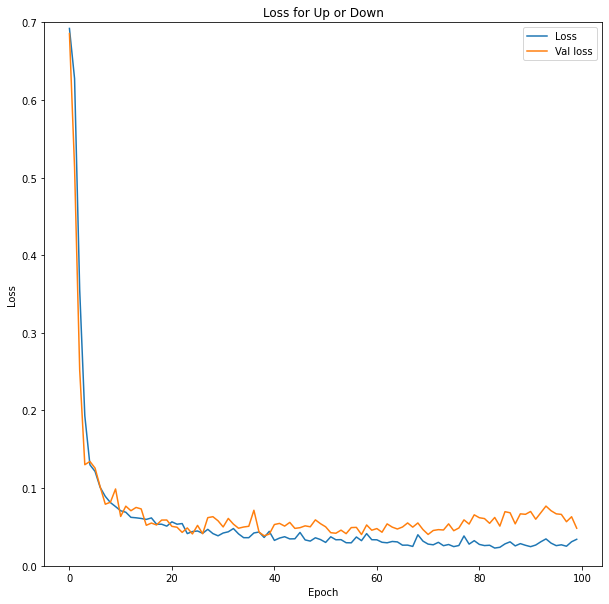

In [ ]:
# Validation
plt.figure(figsize=(10, 10))
plt.plot(History_LSTM_UP.history['loss'], label='Loss')
plt.plot(History_LSTM_UP.history['val_loss'], label = 'Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss for Up or Down')
plt.ylim([0, 0.7])
plt.legend(loc='Upper right')

**END OF PART-1** <br>
Next Part is PCA, which is created to improve the performance of the models to predict the returns.